# 라이브러리 import

In [10]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)
print(np.__version__)

2.6.0
1.22.2


<br>

# 이미지 resize

In [4]:
from PIL import Image 
import glob
import os

print("PIL 라이브러리 import 완료!")

PIL 라이브러리 import 완료!


In [5]:
def resize_images(img_path):
    images=glob.glob(img_path + "/*.jpg")   
    print(len(images), " images to be resized.")

    target_size=(28,28)
    for img in images:
        old_img=Image.open(img)
        new_img=old_img.resize(target_size,Image.ANTIALIAS)
        new_img.save(img, "JPEG")
    print(len(images), " images resized.")

image_dir_path = os.getenv("HOME") + "/aiffel/rock_scissor_paper/scissor"
resize_images(image_dir_path)

print("가위 이미지 resize 완료!")

100  images to be resized.
100  images resized.
가위 이미지 resize 완료!


In [6]:
image_dir_path = os.getenv("HOME") + "/aiffel/rock_scissor_paper/rock"
resize_images(image_dir_path)

print("바위 이미지 resize 완료!")

100  images to be resized.
100  images resized.
바위 이미지 resize 완료!


In [7]:
image_dir_path = os.getenv("HOME") + "/aiffel/rock_scissor_paper/paper"
resize_images(image_dir_path)

print("보 이미지 resize 완료!")

100  images to be resized.
100  images resized.
보 이미지 resize 완료!


<br>

# 데이터 load

In [8]:
import numpy as np

def load_data(img_path, number_of_data=300): # 데이터 실제 총합으로 진행
    img_size=28
    color=3
    imgs=np.zeros(number_of_data*img_size*img_size*color,dtype=np.int32).reshape(number_of_data,img_size,img_size,color)
    labels=np.zeros(number_of_data,dtype=np.int32)

    idx=0
    
    # 가위
    for file in glob.iglob(img_path+'/scissor/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img
        labels[idx]=0
        idx=idx+1

    # 바위
    for file in glob.iglob(img_path+'/rock/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img
        labels[idx]=1
        idx=idx+1  
    
    # 보
    for file in glob.iglob(img_path+'/paper/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img
        labels[idx]=2
        idx=idx+1
        
    print("학습데이터(x_train)의 이미지 개수:", idx)
    return imgs, labels

image_dir_path = os.getenv("HOME") + "/aiffel/rock_scissor_paper"
(x_train, y_train)=load_data(image_dir_path)

# 입력 정규화(0~1)
x_train_norm = x_train/255.0

print("x_train shape: {}".format(x_train.shape))
print("y_train shape: {}".format(y_train.shape))

학습데이터(x_train)의 이미지 개수: 300
x_train shape: (300, 28, 28, 3)
y_train shape: (300,)


<br>

# 딥러닝 모델 학습

Model: "sequential_24"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_48 (Conv2D)           (None, 26, 26, 32)        896       
_________________________________________________________________
max_pooling2d_48 (MaxPooling (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_49 (Conv2D)           (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_49 (MaxPooling (None, 5, 5, 64)          0         
_________________________________________________________________
flatten_24 (Flatten)         (None, 1600)              0         
_________________________________________________________________
dense_48 (Dense)             (None, 64)                102464    
_________________________________________________________________
dropout_24 (Dropout)         (None, 64)              

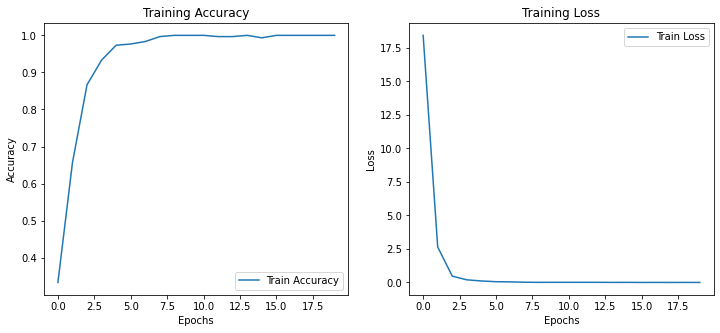

In [63]:
import tensorflow as tf
from tensorflow import keras
import numpy as np

n_channel_1 = 32
n_channel_2 = 64
n_dense = 64
n_train_epoch = 20
batch_size = 32
learning_rate = 0.01
dropout_rate = 0.1

model = keras.models.Sequential()
model.add(keras.layers.Conv2D(n_channel_1, (3,3), activation='relu', input_shape=(28,28,3)))
model.add(keras.layers.MaxPool2D(2,2))
model.add(keras.layers.Conv2D(n_channel_2, (3,3), activation='relu'))
model.add(keras.layers.MaxPooling2D((2,2)))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(n_dense, activation='relu'))
model.add(keras.layers.Dropout(dropout_rate))
model.add(keras.layers.Dense(3, activation='softmax'))

model.summary()

model.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])

history = model.fit(x_train, y_train, epochs=n_train_epoch, batch_size=batch_size)

def plot_history(history):
    plt.figure(figsize=(12, 5))

    # Accuracy
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'], label='Train Accuracy')
    plt.title('Training Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()

    # Loss
    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'], label='Train Loss')
    plt.title('Training Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()

    plt.show()

plot_history(history)

<br>

# 테스트 데이터 적용
- test8까지

In [64]:
categories = ["scissor", "rock", "paper"]
base_path = os.getenv("HOME") + "/aiffel/rock_scissor_paper/test"

# 추가 데이터 경로
additional_data_path = os.getenv("HOME") + "/aiffel/rock_scissor_paper/test2"
additional_data_path2 = os.getenv("HOME") + "/aiffel/rock_scissor_paper/test3"
additional_data_path3 = os.getenv("HOME") + "/aiffel/rock_scissor_paper/test4"
additional_data_path4 = os.getenv("HOME") + "/aiffel/rock_scissor_paper/test5"
additional_data_path5 = os.getenv("HOME") + "/aiffel/rock_scissor_paper/test6"
additional_data_path6 = os.getenv("HOME") + "/aiffel/rock_scissor_paper/test7"
additional_data_path7 = os.getenv("HOME") + "/aiffel/rock_scissor_paper/test8"

for category in categories:
    resize_images(f"{base_path}/{category}")
    resize_images(f"{additional_data_path}/{category}")
    resize_images(f"{additional_data_path2}/{category}")
    resize_images(f"{additional_data_path3}/{category}")
    resize_images(f"{additional_data_path4}/{category}")
    resize_images(f"{additional_data_path5}/{category}")
    resize_images(f"{additional_data_path6}/{category}")
    resize_images(f"{additional_data_path7}/{category}")

# 데이터 로드
(x_test, y_test) = load_data(base_path)
(x_test_additional, y_test_additional) = load_data(additional_data_path)
(x_test_additional2, y_test_additional2) = load_data(additional_data_path2)
(x_test_additional3, y_test_additional3) = load_data(additional_data_path3)
(x_test_additional4, y_test_additional4) = load_data(additional_data_path4)
(x_test_additional5, y_test_additional5) = load_data(additional_data_path5)
(x_test_additional6, y_test_additional6) = load_data(additional_data_path6)
(x_test_additional7, y_test_additional7) = load_data(additional_data_path7)

# 기존 데이터와 추가 데이터를 합침
x_test_combined = np.concatenate((x_test, x_test_additional, x_test_additional2, x_test_additional3, x_test_additional4, x_test_additional5, x_test_additional6, x_test_additional7), axis=0)
y_test_combined = np.concatenate((y_test, y_test_additional, y_test_additional2, y_test_additional3, y_test_additional4, y_test_additional5, y_test_additional6, y_test_additional7), axis=0)


# 정규화
x_test_combined_norm = x_test_combined / 255.0

print(f"x_test_combined shape: {x_test_combined.shape}")
print(f"y_test_combined shape: {y_test_combined.shape}")

# 모델 평가
test_loss, test_accuracy = model.evaluate(x_test_combined_norm, y_test_combined, verbose=2)
print(f"Test loss: {test_loss}")
print(f"Test accuracy: {test_accuracy}")

100  images to be resized.
100  images resized.
100  images to be resized.
100  images resized.
100  images to be resized.
100  images resized.
100  images to be resized.
100  images resized.
100  images to be resized.
100  images resized.
100  images to be resized.
100  images resized.
100  images to be resized.
100  images resized.
100  images to be resized.
100  images resized.
100  images to be resized.
100  images resized.
100  images to be resized.
100  images resized.
100  images to be resized.
100  images resized.
100  images to be resized.
100  images resized.
100  images to be resized.
100  images resized.
100  images to be resized.
100  images resized.
100  images to be resized.
100  images resized.
100  images to be resized.
100  images resized.
100  images to be resized.
100  images resized.
100  images to be resized.
100  images resized.
100  images to be resized.
100  images resized.
100  images to be resized.
100  images resized.
100  images to be resized.
100  images r

Model: "sequential_25"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_50 (Conv2D)           (None, 26, 26, 32)        896       
_________________________________________________________________
max_pooling2d_50 (MaxPooling (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_51 (Conv2D)           (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_51 (MaxPooling (None, 5, 5, 64)          0         
_________________________________________________________________
flatten_25 (Flatten)         (None, 1600)              0         
_________________________________________________________________
dense_50 (Dense)             (None, 64)                102464    
_________________________________________________________________
dropout_25 (Dropout)         (None, 64)              

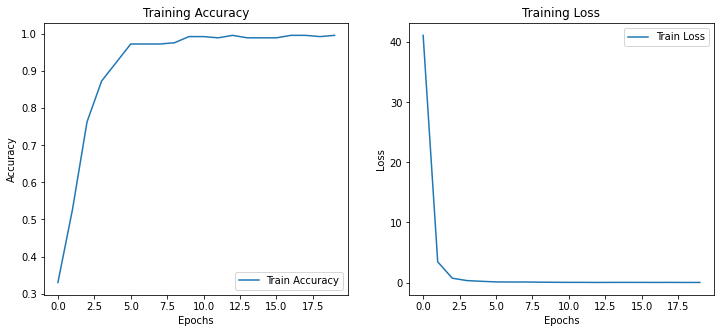

In [71]:
import tensorflow as tf
from tensorflow import keras
import numpy as np

n_channel_1 = 32
n_channel_2 = 64
n_dense = 64
n_train_epoch = 20
batch_size = 32
learning_rate = 0.01
dropout_rate = 0.1

model = keras.models.Sequential()
model.add(keras.layers.Conv2D(n_channel_1, (3,3), activation='relu', input_shape=(28,28,3)))
model.add(keras.layers.MaxPool2D(2,2))
model.add(keras.layers.Conv2D(n_channel_2, (3,3), activation='relu'))
model.add(keras.layers.MaxPooling2D((2,2)))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(n_dense, activation='relu'))
model.add(keras.layers.Dropout(dropout_rate))
model.add(keras.layers.Dense(3, activation='softmax'))

model.summary()

model.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])

history = model.fit(x_train, y_train, epochs=n_train_epoch, batch_size=batch_size)

def plot_history(history):
    plt.figure(figsize=(12, 5))

    # Accuracy
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'], label='Train Accuracy')
    plt.title('Training Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()

    # Loss
    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'], label='Train Loss')
    plt.title('Training Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()

    plt.show()

plot_history(history)

In [72]:
categories = ["scissor", "rock", "paper"]
base_path = os.getenv("HOME") + "/aiffel/rock_scissor_paper/test"

# 추가 데이터 경로
additional_data_path = os.getenv("HOME") + "/aiffel/rock_scissor_paper/test2"
additional_data_path2 = os.getenv("HOME") + "/aiffel/rock_scissor_paper/test3"
additional_data_path3 = os.getenv("HOME") + "/aiffel/rock_scissor_paper/test4"
additional_data_path4 = os.getenv("HOME") + "/aiffel/rock_scissor_paper/test5"
additional_data_path5 = os.getenv("HOME") + "/aiffel/rock_scissor_paper/test6"
additional_data_path6 = os.getenv("HOME") + "/aiffel/rock_scissor_paper/test7"
additional_data_path7 = os.getenv("HOME") + "/aiffel/rock_scissor_paper/test8"

for category in categories:
    resize_images(f"{base_path}/{category}")
    resize_images(f"{additional_data_path}/{category}")
    resize_images(f"{additional_data_path2}/{category}")
    resize_images(f"{additional_data_path3}/{category}")
    resize_images(f"{additional_data_path4}/{category}")
    resize_images(f"{additional_data_path5}/{category}")
    resize_images(f"{additional_data_path6}/{category}")
    resize_images(f"{additional_data_path7}/{category}")

# 데이터 로드
(x_test, y_test) = load_data(base_path)
(x_test_additional, y_test_additional) = load_data(additional_data_path)
(x_test_additional2, y_test_additional2) = load_data(additional_data_path2)
(x_test_additional3, y_test_additional3) = load_data(additional_data_path3)
(x_test_additional4, y_test_additional4) = load_data(additional_data_path4)
(x_test_additional5, y_test_additional5) = load_data(additional_data_path5)
(x_test_additional6, y_test_additional6) = load_data(additional_data_path6)
(x_test_additional7, y_test_additional7) = load_data(additional_data_path7)

# 기존 데이터와 추가 데이터를 합침
x_test_combined = np.concatenate((x_test, x_test_additional, x_test_additional2, x_test_additional3, x_test_additional4, x_test_additional5, x_test_additional6, x_test_additional7), axis=0)
y_test_combined = np.concatenate((y_test, y_test_additional, y_test_additional2, y_test_additional3, y_test_additional4, y_test_additional5, y_test_additional6, y_test_additional7), axis=0)


# 정규화
x_test_combined_norm = x_test_combined / 255.0

print(f"x_test_combined shape: {x_test_combined.shape}")
print(f"y_test_combined shape: {y_test_combined.shape}")

# 모델 평가
test_loss, test_accuracy = model.evaluate(x_test_combined_norm, y_test_combined, verbose=2)
print(f"Test loss: {test_loss}")
print(f"Test accuracy: {test_accuracy}")

100  images to be resized.
100  images resized.
100  images to be resized.
100  images resized.
100  images to be resized.
100  images resized.
100  images to be resized.
100  images resized.
100  images to be resized.
100  images resized.
100  images to be resized.
100  images resized.
100  images to be resized.
100  images resized.
100  images to be resized.
100  images resized.
100  images to be resized.
100  images resized.
100  images to be resized.
100  images resized.
100  images to be resized.
100  images resized.
100  images to be resized.
100  images resized.
100  images to be resized.
100  images resized.
100  images to be resized.
100  images resized.
100  images to be resized.
100  images resized.
100  images to be resized.
100  images resized.
100  images to be resized.
100  images resized.
100  images to be resized.
100  images resized.
100  images to be resized.
100  images resized.
100  images to be resized.
100  images resized.
100  images to be resized.
100  images r

Model: "sequential_48"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_96 (Conv2D)           (None, 26, 26, 32)        896       
_________________________________________________________________
max_pooling2d_96 (MaxPooling (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_97 (Conv2D)           (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_97 (MaxPooling (None, 5, 5, 64)          0         
_________________________________________________________________
flatten_48 (Flatten)         (None, 1600)              0         
_________________________________________________________________
dense_96 (Dense)             (None, 64)                102464    
_________________________________________________________________
dropout_48 (Dropout)         (None, 64)              

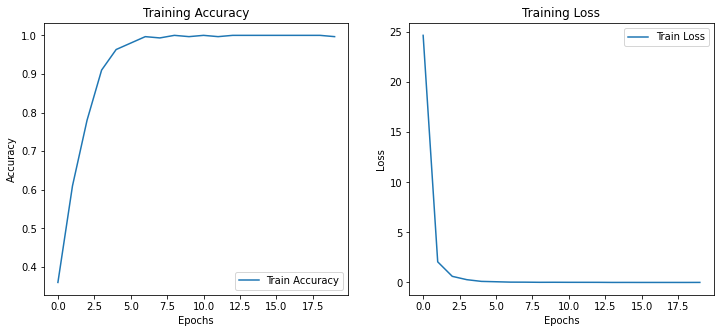

In [127]:
import tensorflow as tf
from tensorflow import keras
import numpy as np

n_channel_1 = 32
n_channel_2 = 64
n_dense = 64
n_train_epoch = 20
batch_size = 32
learning_rate = 0.001
dropout_rate = 0.1

model = keras.models.Sequential()
model.add(keras.layers.Conv2D(n_channel_1, (3,3), activation='relu', input_shape=(28,28,3)))
model.add(keras.layers.MaxPool2D(2,2))
model.add(keras.layers.Conv2D(n_channel_2, (3,3), activation='relu'))
model.add(keras.layers.MaxPooling2D((2,2)))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(n_dense, activation='relu'))
model.add(keras.layers.Dropout(dropout_rate))
model.add(keras.layers.Dense(3, activation='softmax'))

model.summary()

model.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])

history = model.fit(x_train, y_train, epochs=n_train_epoch, batch_size=batch_size)

def plot_history(history):
    plt.figure(figsize=(12, 5))

    # Accuracy
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'], label='Train Accuracy')
    plt.title('Training Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()

    # Loss
    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'], label='Train Loss')
    plt.title('Training Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()

    plt.show()

plot_history(history)

In [128]:
categories = ["scissor", "rock", "paper"]
base_path = os.getenv("HOME") + "/aiffel/rock_scissor_paper/test"

# 추가 데이터 경로
additional_data_path = os.getenv("HOME") + "/aiffel/rock_scissor_paper/test2"
additional_data_path2 = os.getenv("HOME") + "/aiffel/rock_scissor_paper/test3"
additional_data_path3 = os.getenv("HOME") + "/aiffel/rock_scissor_paper/test4"
additional_data_path4 = os.getenv("HOME") + "/aiffel/rock_scissor_paper/test5"
additional_data_path5 = os.getenv("HOME") + "/aiffel/rock_scissor_paper/test6"
additional_data_path6 = os.getenv("HOME") + "/aiffel/rock_scissor_paper/test7"
additional_data_path7 = os.getenv("HOME") + "/aiffel/rock_scissor_paper/test8"

for category in categories:
    resize_images(f"{base_path}/{category}")
    resize_images(f"{additional_data_path}/{category}")
    resize_images(f"{additional_data_path2}/{category}")
    resize_images(f"{additional_data_path3}/{category}")
    resize_images(f"{additional_data_path4}/{category}")
    resize_images(f"{additional_data_path5}/{category}")
    resize_images(f"{additional_data_path6}/{category}")
    resize_images(f"{additional_data_path7}/{category}")

# 데이터 로드
(x_test, y_test) = load_data(base_path)
(x_test_additional, y_test_additional) = load_data(additional_data_path)
(x_test_additional2, y_test_additional2) = load_data(additional_data_path2)
(x_test_additional3, y_test_additional3) = load_data(additional_data_path3)
(x_test_additional4, y_test_additional4) = load_data(additional_data_path4)
(x_test_additional5, y_test_additional5) = load_data(additional_data_path5)
(x_test_additional6, y_test_additional6) = load_data(additional_data_path6)
(x_test_additional7, y_test_additional7) = load_data(additional_data_path7)

# 기존 데이터와 추가 데이터를 합침
x_test_combined = np.concatenate((x_test, x_test_additional, x_test_additional2, x_test_additional3, x_test_additional4, x_test_additional5, x_test_additional6, x_test_additional7), axis=0)
y_test_combined = np.concatenate((y_test, y_test_additional, y_test_additional2, y_test_additional3, y_test_additional4, y_test_additional5, y_test_additional6, y_test_additional7), axis=0)


# 정규화
x_test_combined_norm = x_test_combined / 255.0

print(f"x_test_combined shape: {x_test_combined.shape}")
print(f"y_test_combined shape: {y_test_combined.shape}")

# 모델 평가
test_loss, test_accuracy = model.evaluate(x_test_combined_norm, y_test_combined, verbose=2)
print(f"Test loss: {test_loss}")
print(f"Test accuracy: {test_accuracy}")

100  images to be resized.
100  images resized.
100  images to be resized.
100  images resized.
100  images to be resized.
100  images resized.
100  images to be resized.
100  images resized.
100  images to be resized.
100  images resized.
100  images to be resized.
100  images resized.
100  images to be resized.
100  images resized.
100  images to be resized.
100  images resized.
100  images to be resized.
100  images resized.
100  images to be resized.
100  images resized.
100  images to be resized.
100  images resized.
100  images to be resized.
100  images resized.
100  images to be resized.
100  images resized.
100  images to be resized.
100  images resized.
100  images to be resized.
100  images resized.
100  images to be resized.
100  images resized.
100  images to be resized.
100  images resized.
100  images to be resized.
100  images resized.
100  images to be resized.
100  images resized.
100  images to be resized.
100  images resized.
100  images to be resized.
100  images r

<br>

# 데이터 증강 적용

In [153]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import os
import numpy as np

categories = ["scissor", "rock", "paper"]
base_path = os.getenv("HOME") + "/aiffel/rock_scissor_paper/test"

# 추가 데이터 경로
additional_data_paths = [
    os.getenv("HOME") + f"/aiffel/rock_scissor_paper/test{i}" for i in range(2, 9)
]

def augment_data(x_data, y_data):
    datagen = ImageDataGenerator(
        rotation_range=0,       # 이미지 회전
        width_shift_range=0.01,  # 수평 이동
        height_shift_range=0.01, # 수직 이동
        shear_range=0.01,        # 전단 변환
        zoom_range=0.01,         # 확대/축소
        horizontal_flip=False,   # 좌우 반전 사용 안함
        brightness_range=[1.1, 1.2], # 밝기 조절
        # fill_mode='constant', cval=255
        fill_mode='reflect',
        cval=255
    )

    augmented_x = []
    augmented_y = []

    for x, y in zip(x_data, y_data):
        x = x.reshape((1, *x.shape))
        aug_iter = datagen.flow(x, [y], batch_size=1)
        for _ in range(3):
            aug_data, aug_label = next(aug_iter)
            augmented_x.append(aug_data[0])
            augmented_y.append(aug_label[0])
    
    return np.array(augmented_x), np.array(augmented_y)

def load_and_combine_data(paths):
    x_combined, y_combined = [], []
    for path in paths:
        x_data, y_data = load_data(path)
        x_combined.append(x_data)
        y_combined.append(y_data)
    return np.concatenate(x_combined, axis=0), np.concatenate(y_combined, axis=0)

all_paths = [base_path] + additional_data_paths
x_test_combined, y_test_combined = load_and_combine_data(all_paths)


x_augmented, y_augmented = augment_data(x_test_combined, y_test_combined)


x_final = np.concatenate((x_test_combined, x_augmented), axis=0)
y_final = np.concatenate((y_test_combined, y_augmented), axis=0)


x_final_norm = x_final / 255.0

print(f"x_final shape: {x_final.shape}")
print(f"y_final shape: {y_final.shape}")


test_loss, test_accuracy = model.evaluate(x_final_norm, y_final, verbose=2)
print(f"Test loss: {test_loss}")
print(f"Test accuracy: {test_accuracy}")

학습데이터(x_train)의 이미지 개수: 300
학습데이터(x_train)의 이미지 개수: 300
학습데이터(x_train)의 이미지 개수: 300
학습데이터(x_train)의 이미지 개수: 300
학습데이터(x_train)의 이미지 개수: 300
학습데이터(x_train)의 이미지 개수: 300
학습데이터(x_train)의 이미지 개수: 300
학습데이터(x_train)의 이미지 개수: 300
x_final shape: (9600, 28, 28, 3)
y_final shape: (9600,)
300/300 - 3s - loss: 1.0749 - accuracy: 0.7895
Test loss: 1.074887752532959
Test accuracy: 0.7894791960716248


In [158]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import os
import numpy as np

categories = ["scissor", "rock", "paper"]
base_path = os.getenv("HOME") + "/aiffel/rock_scissor_paper/test"

# 추가 데이터 경로
additional_data_paths = [
    os.getenv("HOME") + f"/aiffel/rock_scissor_paper/test{i}" for i in range(2, 9)
]

def augment_data(x_data, y_data):
    datagen = ImageDataGenerator(
        rotation_range=0,       # 이미지 회전
        width_shift_range=0,  # 수평 이동
        height_shift_range=0.01, # 수직 이동
        shear_range=0.01,        # 전단 변환
        zoom_range=0.01,         # 확대/축소
        horizontal_flip=False,   # 좌우 반전 사용 안함
        brightness_range=[1.1, 1.2], # 밝기 조절
        # fill_mode='constant', cval=255
        fill_mode='reflect',
        cval=255
    )

    augmented_x = []
    augmented_y = []

    for x, y in zip(x_data, y_data):
        x = x.reshape((1, *x.shape))
        aug_iter = datagen.flow(x, [y], batch_size=1)
        for _ in range(3):
            aug_data, aug_label = next(aug_iter)
            augmented_x.append(aug_data[0])
            augmented_y.append(aug_label[0])
    
    return np.array(augmented_x), np.array(augmented_y)

def load_and_combine_data(paths):
    x_combined, y_combined = [], []
    for path in paths:
        x_data, y_data = load_data(path)
        x_combined.append(x_data)
        y_combined.append(y_data)
    return np.concatenate(x_combined, axis=0), np.concatenate(y_combined, axis=0)

all_paths = [base_path] + additional_data_paths
x_test_combined, y_test_combined = load_and_combine_data(all_paths)


x_augmented, y_augmented = augment_data(x_test_combined, y_test_combined)


x_final = np.concatenate((x_test_combined, x_augmented), axis=0)
y_final = np.concatenate((y_test_combined, y_augmented), axis=0)


x_final_norm = x_final / 255.0

print(f"x_final shape: {x_final.shape}")
print(f"y_final shape: {y_final.shape}")


test_loss, test_accuracy = model.evaluate(x_final_norm, y_final, verbose=2)
print(f"Test loss: {test_loss}")
print(f"Test accuracy: {test_accuracy}")

학습데이터(x_train)의 이미지 개수: 300
학습데이터(x_train)의 이미지 개수: 300
학습데이터(x_train)의 이미지 개수: 300
학습데이터(x_train)의 이미지 개수: 300
학습데이터(x_train)의 이미지 개수: 300
학습데이터(x_train)의 이미지 개수: 300
학습데이터(x_train)의 이미지 개수: 300
학습데이터(x_train)의 이미지 개수: 300
x_final shape: (9600, 28, 28, 3)
y_final shape: (9600,)
300/300 - 3s - loss: 1.0739 - accuracy: 0.7896
Test loss: 1.073853611946106
Test accuracy: 0.7895833253860474


In [160]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import os
import numpy as np

categories = ["scissor", "rock", "paper"]
base_path = os.getenv("HOME") + "/aiffel/rock_scissor_paper/test"

# 추가 데이터 경로
additional_data_paths = [
    os.getenv("HOME") + f"/aiffel/rock_scissor_paper/test{i}" for i in range(2, 9)
]

def augment_data(x_data, y_data):
    datagen = ImageDataGenerator(
        rotation_range=0,       # 이미지 회전
        width_shift_range=0,  # 수평 이동
        height_shift_range=0.01, # 수직 이동
        shear_range=0,        # 전단 변환
        zoom_range=0.01,         # 확대/축소
        horizontal_flip=False,   # 좌우 반전 사용 안함
        brightness_range=[1.1, 1.2], # 밝기 조절
        # fill_mode='constant', cval=255
        fill_mode='reflect',
        cval=255
    )

    augmented_x = []
    augmented_y = []

    for x, y in zip(x_data, y_data):
        x = x.reshape((1, *x.shape))
        aug_iter = datagen.flow(x, [y], batch_size=1)
        for _ in range(3):
            aug_data, aug_label = next(aug_iter)
            augmented_x.append(aug_data[0])
            augmented_y.append(aug_label[0])
    
    return np.array(augmented_x), np.array(augmented_y)

def load_and_combine_data(paths):
    x_combined, y_combined = [], []
    for path in paths:
        x_data, y_data = load_data(path)
        x_combined.append(x_data)
        y_combined.append(y_data)
    return np.concatenate(x_combined, axis=0), np.concatenate(y_combined, axis=0)

all_paths = [base_path] + additional_data_paths
x_test_combined, y_test_combined = load_and_combine_data(all_paths)


x_augmented, y_augmented = augment_data(x_test_combined, y_test_combined)


x_final = np.concatenate((x_test_combined, x_augmented), axis=0)
y_final = np.concatenate((y_test_combined, y_augmented), axis=0)


x_final_norm = x_final / 255.0

print(f"x_final shape: {x_final.shape}")
print(f"y_final shape: {y_final.shape}")


test_loss, test_accuracy = model.evaluate(x_final_norm, y_final, verbose=2)
print(f"Test loss: {test_loss}")
print(f"Test accuracy: {test_accuracy}")

학습데이터(x_train)의 이미지 개수: 300
학습데이터(x_train)의 이미지 개수: 300
학습데이터(x_train)의 이미지 개수: 300
학습데이터(x_train)의 이미지 개수: 300
학습데이터(x_train)의 이미지 개수: 300
학습데이터(x_train)의 이미지 개수: 300
학습데이터(x_train)의 이미지 개수: 300
학습데이터(x_train)의 이미지 개수: 300
x_final shape: (9600, 28, 28, 3)
y_final shape: (9600,)
300/300 - 3s - loss: 1.0738 - accuracy: 0.7901
Test loss: 1.0738029479980469
Test accuracy: 0.7901041507720947


In [182]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import os
import numpy as np

categories = ["scissor", "rock", "paper"]
base_path = os.getenv("HOME") + "/aiffel/rock_scissor_paper/test"

# 추가 데이터 경로
additional_data_paths = [
    os.getenv("HOME") + f"/aiffel/rock_scissor_paper/test{i}" for i in range(2, 9)
]

def augment_data(x_data, y_data):
    datagen = ImageDataGenerator(
        rotation_range=0,       # 이미지 회전
        width_shift_range=0,  # 수평 이동
        height_shift_range=0.01, # 수직 이동
        shear_range=0,        # 전단 변환
        zoom_range=0.01,         # 확대/축소
        horizontal_flip=False,   # 좌우 반전 사용 안함
        brightness_range=[1.1, 1.1], # 밝기 조절
        # fill_mode='constant', cval=255
        fill_mode='reflect',
        cval=255
    )

    augmented_x = []
    augmented_y = []

    for x, y in zip(x_data, y_data):
        x = x.reshape((1, *x.shape))
        aug_iter = datagen.flow(x, [y], batch_size=1)
        for _ in range(3):
            aug_data, aug_label = next(aug_iter)
            augmented_x.append(aug_data[0])
            augmented_y.append(aug_label[0])
    
    return np.array(augmented_x), np.array(augmented_y)

def load_and_combine_data(paths):
    x_combined, y_combined = [], []
    for path in paths:
        x_data, y_data = load_data(path)
        x_combined.append(x_data)
        y_combined.append(y_data)
    return np.concatenate(x_combined, axis=0), np.concatenate(y_combined, axis=0)

all_paths = [base_path] + additional_data_paths
x_test_combined, y_test_combined = load_and_combine_data(all_paths)


x_augmented, y_augmented = augment_data(x_test_combined, y_test_combined)


x_final = np.concatenate((x_test_combined, x_augmented), axis=0)
y_final = np.concatenate((y_test_combined, y_augmented), axis=0)


x_final_norm = x_final / 255.0

print(f"x_final shape: {x_final.shape}")
print(f"y_final shape: {y_final.shape}")


test_loss, test_accuracy = model.evaluate(x_final_norm, y_final, verbose=2)
print(f"Test loss: {test_loss}")
print(f"Test accuracy: {test_accuracy}")

학습데이터(x_train)의 이미지 개수: 300
학습데이터(x_train)의 이미지 개수: 300
학습데이터(x_train)의 이미지 개수: 300
학습데이터(x_train)의 이미지 개수: 300
학습데이터(x_train)의 이미지 개수: 300
학습데이터(x_train)의 이미지 개수: 300
학습데이터(x_train)의 이미지 개수: 300
학습데이터(x_train)의 이미지 개수: 300
x_final shape: (9600, 28, 28, 3)
y_final shape: (9600,)
300/300 - 3s - loss: 1.0745 - accuracy: 0.7907
Test loss: 1.0744669437408447
Test accuracy: 0.7907291650772095


In [186]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import os
import numpy as np

categories = ["scissor", "rock", "paper"]
base_path = os.getenv("HOME") + "/aiffel/rock_scissor_paper/test"

# 추가 데이터 경로
additional_data_paths = [
    os.getenv("HOME") + f"/aiffel/rock_scissor_paper/test{i}" for i in range(2, 9)
]

def augment_data(x_data, y_data):
    datagen = ImageDataGenerator(
        rotation_range=0,       # 이미지 회전
        width_shift_range=0,  # 수평 이동
        height_shift_range=0.01, # 수직 이동
        shear_range=0,        # 전단 변환
        zoom_range=0.02,         # 확대/축소
        horizontal_flip=False,   # 좌우 반전 사용 안함
        brightness_range=[1.1, 1.1], # 밝기 조절
        #fill_mode='constant', cval=255
        fill_mode='reflect',
        cval=255
    )

    augmented_x = []
    augmented_y = []

    for x, y in zip(x_data, y_data):
        x = x.reshape((1, *x.shape))
        aug_iter = datagen.flow(x, [y], batch_size=1)
        for _ in range(3):
            aug_data, aug_label = next(aug_iter)
            augmented_x.append(aug_data[0])
            augmented_y.append(aug_label[0])
    
    return np.array(augmented_x), np.array(augmented_y)

def load_and_combine_data(paths):
    x_combined, y_combined = [], []
    for path in paths:
        x_data, y_data = load_data(path)
        x_combined.append(x_data)
        y_combined.append(y_data)
    return np.concatenate(x_combined, axis=0), np.concatenate(y_combined, axis=0)

all_paths = [base_path] + additional_data_paths
x_test_combined, y_test_combined = load_and_combine_data(all_paths)


x_augmented, y_augmented = augment_data(x_test_combined, y_test_combined)


x_final = np.concatenate((x_test_combined, x_augmented), axis=0)
y_final = np.concatenate((y_test_combined, y_augmented), axis=0)


x_final_norm = x_final / 255.0

print(f"x_final shape: {x_final.shape}")
print(f"y_final shape: {y_final.shape}")


test_loss, test_accuracy = model.evaluate(x_final_norm, y_final, verbose=2)
print(f"Test loss: {test_loss}")
print(f"Test accuracy: {test_accuracy}")

학습데이터(x_train)의 이미지 개수: 300
학습데이터(x_train)의 이미지 개수: 300
학습데이터(x_train)의 이미지 개수: 300
학습데이터(x_train)의 이미지 개수: 300
학습데이터(x_train)의 이미지 개수: 300
학습데이터(x_train)의 이미지 개수: 300
학습데이터(x_train)의 이미지 개수: 300
학습데이터(x_train)의 이미지 개수: 300
x_final shape: (9600, 28, 28, 3)
y_final shape: (9600,)
300/300 - 3s - loss: 1.0746 - accuracy: 0.7908
Test loss: 1.0745948553085327
Test accuracy: 0.7908333539962769


In [196]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import os
import numpy as np

categories = ["scissor", "rock", "paper"]
base_path = os.getenv("HOME") + "/aiffel/rock_scissor_paper/test"

# 추가 데이터 경로
additional_data_paths = [
    os.getenv("HOME") + f"/aiffel/rock_scissor_paper/test{i}" for i in range(2, 9)
]

def augment_data(x_data, y_data):
    datagen = ImageDataGenerator(
        rotation_range=0,       # 이미지 회전
        width_shift_range=0,  # 수평 이동
        height_shift_range=0.01, # 수직 이동
        shear_range=0,        # 전단 변환
        zoom_range=0.02,         # 확대/축소
        horizontal_flip=False,   # 좌우 반전 사용 안함
        brightness_range=[1.1, 1.1], # 밝기 조절
        #fill_mode='constant', cval=255
        fill_mode='reflect',
        cval=255,
        channel_shift_range=20
    )

    augmented_x = []
    augmented_y = []

    for x, y in zip(x_data, y_data):
        x = x.reshape((1, *x.shape))
        aug_iter = datagen.flow(x, [y], batch_size=1)
        for _ in range(3):
            aug_data, aug_label = next(aug_iter)
            augmented_x.append(aug_data[0])
            augmented_y.append(aug_label[0])
    
    return np.array(augmented_x), np.array(augmented_y)

def load_and_combine_data(paths):
    x_combined, y_combined = [], []
    for path in paths:
        x_data, y_data = load_data(path)
        x_combined.append(x_data)
        y_combined.append(y_data)
    return np.concatenate(x_combined, axis=0), np.concatenate(y_combined, axis=0)

all_paths = [base_path] + additional_data_paths
x_test_combined, y_test_combined = load_and_combine_data(all_paths)


x_augmented, y_augmented = augment_data(x_test_combined, y_test_combined)


x_final = np.concatenate((x_test_combined, x_augmented), axis=0)
y_final = np.concatenate((y_test_combined, y_augmented), axis=0)


x_final_norm = x_final / 255.0

print(f"x_final shape: {x_final.shape}")
print(f"y_final shape: {y_final.shape}")


test_loss, test_accuracy = model.evaluate(x_final_norm, y_final, verbose=2)
print(f"Test loss: {test_loss}")
print(f"Test accuracy: {test_accuracy}")

학습데이터(x_train)의 이미지 개수: 300
학습데이터(x_train)의 이미지 개수: 300
학습데이터(x_train)의 이미지 개수: 300
학습데이터(x_train)의 이미지 개수: 300
학습데이터(x_train)의 이미지 개수: 300
학습데이터(x_train)의 이미지 개수: 300
학습데이터(x_train)의 이미지 개수: 300
학습데이터(x_train)의 이미지 개수: 300
x_final shape: (9600, 28, 28, 3)
y_final shape: (9600,)
300/300 - 3s - loss: 1.0736 - accuracy: 0.7919
Test loss: 1.0736089944839478
Test accuracy: 0.7918750047683716


In [198]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import os
import numpy as np

categories = ["scissor", "rock", "paper"]
base_path = os.getenv("HOME") + "/aiffel/rock_scissor_paper/test"

# 추가 데이터 경로
additional_data_paths = [
    os.getenv("HOME") + f"/aiffel/rock_scissor_paper/test{i}" for i in range(2, 9)
]

def augment_data(x_data, y_data):
    datagen = ImageDataGenerator(
        rotation_range=0,       # 이미지 회전
        width_shift_range=0,  # 수평 이동
        height_shift_range=0.01, # 수직 이동
        shear_range=0,        # 전단 변환
        zoom_range=0.02,         # 확대/축소
        horizontal_flip=False,   # 좌우 반전 사용 안함
        brightness_range=[1.1, 1.1], # 밝기 조절
        #fill_mode='constant', cval=255
        fill_mode='reflect',
        cval=255,
        channel_shift_range=10
    )

    augmented_x = []
    augmented_y = []

    for x, y in zip(x_data, y_data):
        x = x.reshape((1, *x.shape))
        aug_iter = datagen.flow(x, [y], batch_size=1)
        for _ in range(3):
            aug_data, aug_label = next(aug_iter)
            augmented_x.append(aug_data[0])
            augmented_y.append(aug_label[0])
    
    return np.array(augmented_x), np.array(augmented_y)

def load_and_combine_data(paths):
    x_combined, y_combined = [], []
    for path in paths:
        x_data, y_data = load_data(path)
        x_combined.append(x_data)
        y_combined.append(y_data)
    return np.concatenate(x_combined, axis=0), np.concatenate(y_combined, axis=0)

all_paths = [base_path] + additional_data_paths
x_test_combined, y_test_combined = load_and_combine_data(all_paths)


x_augmented, y_augmented = augment_data(x_test_combined, y_test_combined)


x_final = np.concatenate((x_test_combined, x_augmented), axis=0)
y_final = np.concatenate((y_test_combined, y_augmented), axis=0)


x_final_norm = x_final / 255.0

print(f"x_final shape: {x_final.shape}")
print(f"y_final shape: {y_final.shape}")


test_loss, test_accuracy = model.evaluate(x_final_norm, y_final, verbose=2)
print(f"Test loss: {test_loss}")
print(f"Test accuracy: {test_accuracy}")

학습데이터(x_train)의 이미지 개수: 300
학습데이터(x_train)의 이미지 개수: 300
학습데이터(x_train)의 이미지 개수: 300
학습데이터(x_train)의 이미지 개수: 300
학습데이터(x_train)의 이미지 개수: 300
학습데이터(x_train)의 이미지 개수: 300
학습데이터(x_train)의 이미지 개수: 300
학습데이터(x_train)의 이미지 개수: 300
x_final shape: (9600, 28, 28, 3)
y_final shape: (9600,)
300/300 - 3s - loss: 1.0741 - accuracy: 0.7924
Test loss: 1.07411789894104
Test accuracy: 0.792395830154419


In [215]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import os
import numpy as np

categories = ["scissor", "rock", "paper"]
base_path = os.getenv("HOME") + "/aiffel/rock_scissor_paper/test"

# 추가 데이터 경로
additional_data_paths = [
    os.getenv("HOME") + f"/aiffel/rock_scissor_paper/test{i}" for i in range(2, 9)
]

def augment_data(x_data, y_data):
    datagen = ImageDataGenerator(
        rotation_range=0,       # 이미지 회전
        width_shift_range=0,  # 수평 이동
        height_shift_range=0.01, # 수직 이동
        shear_range=0,        # 전단 변환
        zoom_range=0.02,         # 확대/축소
        horizontal_flip=False,   # 좌우 반전 사용 안함
        brightness_range=[1.1, 1.1], # 밝기 조절
        fill_mode='reflect',
        cval=255,
        channel_shift_range=17
    )

    augmented_x = []
    augmented_y = []

    for x, y in zip(x_data, y_data):
        x = x.reshape((1, *x.shape))
        aug_iter = datagen.flow(x, [y], batch_size=1)
        for _ in range(3):
            aug_data, aug_label = next(aug_iter)
            augmented_x.append(aug_data[0])
            augmented_y.append(aug_label[0])
    
    return np.array(augmented_x), np.array(augmented_y)

def load_and_combine_data(paths):
    x_combined, y_combined = [], []
    for path in paths:
        x_data, y_data = load_data(path)
        x_combined.append(x_data)
        y_combined.append(y_data)
    return np.concatenate(x_combined, axis=0), np.concatenate(y_combined, axis=0)

all_paths = [base_path] + additional_data_paths
x_test_combined, y_test_combined = load_and_combine_data(all_paths)


x_augmented, y_augmented = augment_data(x_test_combined, y_test_combined)


x_final = np.concatenate((x_test_combined, x_augmented), axis=0)
y_final = np.concatenate((y_test_combined, y_augmented), axis=0)


x_final_norm = x_final / 255.0

print(f"x_final shape: {x_final.shape}")
print(f"y_final shape: {y_final.shape}")


test_loss, test_accuracy = model.evaluate(x_final_norm, y_final, verbose=2)
print(f"Test loss: {test_loss}")
print(f"Test accuracy: {test_accuracy}")

학습데이터(x_train)의 이미지 개수: 300
학습데이터(x_train)의 이미지 개수: 300
학습데이터(x_train)의 이미지 개수: 300
학습데이터(x_train)의 이미지 개수: 300
학습데이터(x_train)의 이미지 개수: 300
학습데이터(x_train)의 이미지 개수: 300
학습데이터(x_train)의 이미지 개수: 300
학습데이터(x_train)의 이미지 개수: 300
x_final shape: (9600, 28, 28, 3)
y_final shape: (9600,)
300/300 - 3s - loss: 1.0738 - accuracy: 0.7935
Test loss: 1.0737667083740234
Test accuracy: 0.793541669845581


In [244]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import os
import numpy as np

categories = ["scissor", "rock", "paper"]
base_path = os.getenv("HOME") + "/aiffel/rock_scissor_paper/test"

# 추가 데이터 경로
additional_data_paths = [
    os.getenv("HOME") + f"/aiffel/rock_scissor_paper/test{i}" for i in range(2, 9)
]

def augment_data(x_data, y_data):
    datagen = ImageDataGenerator(
        rotation_range=0,       # 이미지 회전
        width_shift_range=0,  # 수평 이동
        height_shift_range=0.01, # 수직 이동
        shear_range=0,        # 전단 변환
        zoom_range=0.02,         # 확대/축소
        horizontal_flip=False,   # 좌우 반전 사용 안함
        brightness_range=[1.1, 1.1], # 밝기 조절
        fill_mode='reflect',
        cval=255,
        channel_shift_range=17
    )

    augmented_x = []
    augmented_y = []

    for x, y in zip(x_data, y_data):
        x = x.reshape((1, *x.shape))
        aug_iter = datagen.flow(x, [y], batch_size=1)
        for _ in range(3):
            aug_data, aug_label = next(aug_iter)
            augmented_x.append(aug_data[0])
            augmented_y.append(aug_label[0])
    
    return np.array(augmented_x), np.array(augmented_y)

def load_and_combine_data(paths):
    x_combined, y_combined = [], []
    for path in paths:
        x_data, y_data = load_data(path)
        x_combined.append(x_data)
        y_combined.append(y_data)
    return np.concatenate(x_combined, axis=0), np.concatenate(y_combined, axis=0)

all_paths = [base_path] + additional_data_paths
x_test_combined, y_test_combined = load_and_combine_data(all_paths)


x_augmented, y_augmented = augment_data(x_test_combined, y_test_combined)


x_final = np.concatenate((x_test_combined, x_augmented), axis=0)
y_final = np.concatenate((y_test_combined, y_augmented), axis=0)


x_final_norm = x_final / 255.0

print(f"x_final shape: {x_final.shape}")
print(f"y_final shape: {y_final.shape}")


test_loss, test_accuracy = model.evaluate(x_final_norm, y_final, verbose=2)
print(f"Test loss: {test_loss}")
print(f"Test accuracy: {test_accuracy}")

학습데이터(x_train)의 이미지 개수: 300
학습데이터(x_train)의 이미지 개수: 300
학습데이터(x_train)의 이미지 개수: 300
학습데이터(x_train)의 이미지 개수: 300
학습데이터(x_train)의 이미지 개수: 300
학습데이터(x_train)의 이미지 개수: 300
학습데이터(x_train)의 이미지 개수: 300
학습데이터(x_train)의 이미지 개수: 300
x_final shape: (9600, 28, 28, 3)
y_final shape: (9600,)
300/300 - 3s - loss: 1.0738 - accuracy: 0.7936
Test loss: 1.0737545490264893
Test accuracy: 0.7936458587646484


# Test7, Test8 추가 결과
#### 이전(~test6) : 0.7043
#### 적용 이후 : 0.7936
- 최종 파라미터
```
    datagen = ImageDataGenerator(
        rotation_range=0,       # 이미지 회전
        width_shift_range=0,  # 수평 이동
        height_shift_range=0.01, # 수직 이동
        shear_range=0,        # 전단 변환
        zoom_range=0.02,         # 확대/축소
        horizontal_flip=False,   # 좌우 반전 사용 안함
        brightness_range=[1.1, 1.1], # 밝기 조절
        fill_mode='reflect',
        cval=255,
        channel_shift_range=17
    )
```

<br>

> # 총, 약 12% 정도 증가 성공